## pandas DF of each dataframe

In [2]:
import pandas as pd

In [3]:
df_targets = pd.read_csv('/users/gavin/Documents/Metis/Coursework/Project_3/data_sources/spreadspoke_scores.csv')

In [4]:
df_targets=df_targets[df_targets['schedule_season']>2014]

In [5]:
df_targets.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
11343,09/10/2015,2015,1,False,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,51,Gillette Stadium,False,64.0,9.0,NaN,Rain
11344,09/13/2015,2015,1,False,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,48.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME
11345,09/13/2015,2015,1,False,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,44.5,Ralph Wilson Stadium,False,53.0,7.0,NaN,NaN
11346,09/13/2015,2015,1,False,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,48.5,Soldier Field,False,68.0,4.0,NaN,NaN
11347,09/13/2015,2015,1,False,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,52.5,Cowboys Stadium,False,72.0,0.0,NaN,DOME


In [6]:
df_team_dict = {'NE': 'New England Patriots', 'ARI': 'Arizona Cardinals', 'IND': 'Indianapolis Colts', 'GB': 'Green Bay Packers', 'DAL': "Dallas Cowboys", 'DEN': "Denver Broncos", 'KC': 'Kansas City Chiefs', 'CAR': 'Carolina Panthers', 'NYJ': 'New York Jets', 'OAK': 'Oakland Raiders',
       'LAC': "Los Angeles Chargers", 'SEA': 'Seattle Seahawks', 'TB': 'Tampa Bay Buccaneers', 'MIA': 'Miami Dolphis', 'PHI': 'Philadelphia Eagles', 'MIN':'Minnesota Vikings', 'BUF': 'Buffalo Bills', 'CIN': 'Cincinnati Bengals', 'TEN':'Tennessee Titans', 'NO':'New Orleans Saints',
       'NYG': 'New York Giants', 'BAL': 'Baltimore Ravens', 'PIT':'Pittsburgh Steelers', 'LAR': 'Los Angeles Rams', 'CLE': 'Cleveland Browns', 'PICK':'PICK', 'HOU':'Houston Texans', 'ATL':'Atlanta Falcons', 'DET':'Detroit Lions',
       'JAX':'Jacksonville Jaguars', 'WAS': 'Washington Redskins', 'CHI':'Chicago Bears', 'SF': 'San Francisco 49ers'}

In [7]:
df_targets['team_favorite_id_fix'] = df_targets['team_favorite_id'].map(df_team_dict)

In [8]:
df_targets['home_spread']=df_targets['spread_favorite']
df_targets['away_spread']=df_targets['spread_favorite']
df_targets.loc[df_targets['team_home']!=df_targets['team_favorite_id_fix'], 'home_spread']=df_targets['spread_favorite']*(-1)
df_targets.loc[df_targets['team_away']!=df_targets['team_favorite_id_fix'], 'away_spread']=df_targets['spread_favorite']*(-1)

In [9]:
df_targets.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite_id_fix,home_spread,away_spread
11343,09/10/2015,2015,1,False,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,51,Gillette Stadium,False,64.0,9.0,NaN,Rain,New England Patriots,-7.0,7.0
11344,09/13/2015,2015,1,False,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,48.5,University of Phoenix Stadium,False,72.0,0.0,NaN,DOME,Arizona Cardinals,-2.5,2.5
11345,09/13/2015,2015,1,False,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,44.5,Ralph Wilson Stadium,False,53.0,7.0,NaN,NaN,Indianapolis Colts,1.0,-1.0
11346,09/13/2015,2015,1,False,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,48.5,Soldier Field,False,68.0,4.0,NaN,NaN,Green Bay Packers,6.5,-6.5
11347,09/13/2015,2015,1,False,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,52.5,Cowboys Stadium,False,72.0,0.0,NaN,DOME,Dallas Cowboys,-7.0,7.0


In [10]:
df_targets['weather_detail'].fillna('no_rain', inplace=True)

In [11]:
timezones_dict={'New England Patriots': 1, 'Arizona Cardinals':3, 'Indianapolis Colts': 1, 'Green Bay Packers': 2, "Dallas Cowboys": 2, "Denver Broncos": 3, 'Kansas City Chiefs':2, 'Carolina Panthers':1, 'New York Jets':1, 'Oakland Raiders':4,
       "Los Angeles Chargers":4, 'Seattle Seahawks':4, 'Tampa Bay Buccaneers':1, 'Miami Dolphis':1, 'Philadelphia Eagles':1, 'Minnesota Vikings':2, 'Buffalo Bills':1, 'Cincinnati Bengals':1, 'Tennessee Titans':2, 'New Orleans Saints':2,
       'New York Giants':1, 'Baltimore Ravens':1, 'Pittsburgh Steelers':1, 'Los Angeles Rams':3, 'Cleveland Browns':1, 'Houston Texans':2, 'Atlanta Falcons':1, 'Detroit Lions':1,
       'Jacksonville Jaguars':1, 'Washington Redskins':1, 'Chicago Bears':2, 'San Francisco 49ers':4}


In [12]:
df_targets['home_timezone'] = df_targets['team_home'].map(timezones_dict)
df_targets['away_timezone'] = df_targets['team_away'].map(timezones_dict)

In [13]:
df_targets.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite_id_fix,home_spread,away_spread,home_timezone,away_timezone
11343,09/10/2015,2015,1,False,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,...,False,64.0,9.0,NaN,Rain,New England Patriots,-7.0,7.0,1.0,1.0
11344,09/13/2015,2015,1,False,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,...,False,72.0,0.0,NaN,DOME,Arizona Cardinals,-2.5,2.5,3.0,2.0
11345,09/13/2015,2015,1,False,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,...,False,53.0,7.0,NaN,no_rain,Indianapolis Colts,1.0,-1.0,1.0,1.0
11346,09/13/2015,2015,1,False,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,...,False,68.0,4.0,NaN,no_rain,Green Bay Packers,6.5,-6.5,2.0,2.0
11347,09/13/2015,2015,1,False,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,...,False,72.0,0.0,NaN,DOME,Dallas Cowboys,-7.0,7.0,2.0,1.0


In [14]:
df_targets_home = df_targets.copy()
df_targets_away=df_targets.copy()
df_targets_home.rename(columns={'team_home':'target', 'team_away': 'opposition', 'home_timezone':'target_timezone', 'away_timezone': 'opponent_timezone', 'away_timezone_change': 'opposition_timezone_change', 'score_home': 'target_score', 'score_away': 'opponent_score', 'home_spread': 'target_spread', 'away_spread': 'opponent_spread'}, inplace=True)
df_targets_away.rename(columns={'team_away':'target', 'team_home':'opposition','away_timezone':'target_timezone', 'home_timezone': 'opponent_timezone', 'home_timezone_change': 'opposition_timezone_change', 'score_away': 'target_score', 'score_home': 'opponent_score', 'away_spread': 'target_spread', 'home_spread': 'opponent_spread'}, inplace=True)



In [15]:
df_targets_home.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,target,target_score,opponent_score,opposition,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_favorite_id_fix,target_spread,opponent_spread,target_timezone,opponent_timezone
11343,09/10/2015,2015,1,False,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,...,False,64.0,9.0,NaN,Rain,New England Patriots,-7.0,7.0,1.0,1.0
11344,09/13/2015,2015,1,False,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,...,False,72.0,0.0,NaN,DOME,Arizona Cardinals,-2.5,2.5,3.0,2.0
11345,09/13/2015,2015,1,False,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,...,False,53.0,7.0,NaN,no_rain,Indianapolis Colts,1.0,-1.0,1.0,1.0
11346,09/13/2015,2015,1,False,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,...,False,68.0,4.0,NaN,no_rain,Green Bay Packers,6.5,-6.5,2.0,2.0
11347,09/13/2015,2015,1,False,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,...,False,72.0,0.0,NaN,DOME,Dallas Cowboys,-7.0,7.0,2.0,1.0


In [16]:
df_targets_home['target_timezone_change'] = 0
df_targets_home['opponent_timezone_change']=df_targets_home['target_timezone']-df_targets_home['opponent_timezone']
df_targets_home['target_home']=1
df_targets_away['opponent_timezone_change'] = 0
df_targets_away['target_timezone_change']=df_targets_away['opponent_timezone']-df_targets_away['target_timezone']
df_targets_away['target_home']=0

In [17]:
df_targets_away.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,opposition,opponent_score,target_score,target,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,team_favorite_id_fix,opponent_spread,target_spread,opponent_timezone,target_timezone,opponent_timezone_change,target_timezone_change,target_home
11343,09/10/2015,2015,1,False,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,...,NaN,Rain,New England Patriots,-7.0,7.0,1.0,1.0,0,0.0,0
11344,09/13/2015,2015,1,False,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,...,NaN,DOME,Arizona Cardinals,-2.5,2.5,3.0,2.0,0,1.0,0
11345,09/13/2015,2015,1,False,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,...,NaN,no_rain,Indianapolis Colts,1.0,-1.0,1.0,1.0,0,0.0,0
11346,09/13/2015,2015,1,False,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,...,NaN,no_rain,Green Bay Packers,6.5,-6.5,2.0,2.0,0,0.0,0
11347,09/13/2015,2015,1,False,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,...,NaN,DOME,Dallas Cowboys,-7.0,7.0,2.0,1.0,0,1.0,0


In [18]:
df_concat=df_targets_home.append(df_targets_away)

In [19]:
df_concat.columns.to_list()

['schedule_date',
 'schedule_season',
 'schedule_week',
 'schedule_playoff',
 'target',
 'target_score',
 'opponent_score',
 'opposition',
 'team_favorite_id',
 'spread_favorite',
 'over_under_line',
 'stadium',
 'stadium_neutral',
 'weather_temperature',
 'weather_wind_mph',
 'weather_humidity',
 'weather_detail',
 'team_favorite_id_fix',
 'target_spread',
 'opponent_spread',
 'target_timezone',
 'opponent_timezone',
 'target_timezone_change',
 'opponent_timezone_change',
 'target_home']

In [20]:
df_concat['target_favorite']=0
df_concat.loc[df_concat['target']==df_concat['team_favorite_id_fix'], 'target_favorite']=1
df_concat['beat_spread']=0
df_concat.loc[(df_concat['target_score']+df_concat['target_spread'])>df_concat['opponent_score'], 'beat_spread']=1

In [21]:
df_concat.dtypes

schedule_date                object
schedule_season               int64
schedule_week                object
schedule_playoff               bool
target                       object
target_score                  int64
opponent_score                int64
opposition                   object
team_favorite_id             object
spread_favorite             float64
over_under_line              object
stadium                      object
stadium_neutral                bool
weather_temperature         float64
weather_wind_mph            float64
weather_humidity             object
weather_detail               object
team_favorite_id_fix         object
target_spread               float64
opponent_spread             float64
target_timezone             float64
opponent_timezone           float64
target_timezone_change      float64
opponent_timezone_change    float64
target_home                   int64
target_favorite               int64
beat_spread                   int64
dtype: object

In [22]:
df_concat['target_adj_for_timezone_EtoW']=0
df_concat['target_adj_for_timezone_WtoE']=0
df_concat.loc[df_concat['target_timezone_change']<0, 'target_adj_for_timezone_EtoW'] = df_concat.loc[df_concat['target_timezone_change']<0, 'target_timezone_change']
df_concat.loc[df_concat['target_timezone_change']>0, 'target_adj_for_timezone_WtoE'] = df_concat.loc[df_concat['target_timezone_change']>0, 'target_timezone_change']*(-1)
df_concat.loc[df_concat['opponent_timezone_change']<0, 'target_adj_for_timezone_EtoW'] = df_concat.loc[df_concat['opponent_timezone_change']<0,'opponent_timezone_change']*(-1)
df_concat.loc[df_concat['opponent_timezone_change']>0, 'target_adj_for_timezone_WtoE'] = df_concat.loc[df_concat['opponent_timezone_change']>0,'opponent_timezone_change']

In [23]:
df_concat.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,target,target_score,opponent_score,opposition,team_favorite_id,spread_favorite,...,opponent_spread,target_timezone,opponent_timezone,target_timezone_change,opponent_timezone_change,target_home,target_favorite,beat_spread,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE
11343,09/10/2015,2015,1,False,New England Patriots,28,21,Pittsburgh Steelers,NE,-7.0,...,7.0,1.0,1.0,0.0,0.0,1,1,0,0.0,0.0
11344,09/13/2015,2015,1,False,Arizona Cardinals,31,19,New Orleans Saints,ARI,-2.5,...,2.5,3.0,2.0,0.0,1.0,1,1,1,0.0,1.0
11345,09/13/2015,2015,1,False,Buffalo Bills,27,14,Indianapolis Colts,IND,-1.0,...,-1.0,1.0,1.0,0.0,0.0,1,0,1,0.0,0.0
11346,09/13/2015,2015,1,False,Chicago Bears,23,31,Green Bay Packers,GB,-6.5,...,-6.5,2.0,2.0,0.0,0.0,1,0,0,0.0,0.0
11347,09/13/2015,2015,1,False,Dallas Cowboys,27,26,New York Giants,DAL,-7.0,...,7.0,2.0,1.0,0.0,1.0,1,1,0,0.0,1.0


In [24]:
df=df_concat[['target','opposition', 'schedule_season', 'target_spread', 'beat_spread', 'target_home','target_adj_for_timezone_EtoW', 'target_adj_for_timezone_WtoE']]

In [25]:
df.head()

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE
11343,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0
11344,Arizona Cardinals,New Orleans Saints,2015,-2.5,1,1,0.0,1.0
11345,Buffalo Bills,Indianapolis Colts,2015,1.0,1,1,0.0,0.0
11346,Chicago Bears,Green Bay Packers,2015,6.5,0,1,0.0,0.0
11347,Dallas Cowboys,New York Giants,2015,-7.0,0,1,0.0,1.0


## Begin bringing in outside info

In [26]:
offense=pd.read_csv('/Users/gavin/Documents/Metis/Coursework/Project_3/data_sources/team_year_end_stats.csv')
defense=pd.read_csv('/Users/gavin/Documents/Metis/Coursework/Project_3/data_sources/team_defense.csv')

### Create target/opponent team interactions which will later interact with spread

points_to_spread = (target_points_per_game / opponent_points_per_game)/target_spread

In [27]:
df_staging_target=df_concat[['target', 'opposition', 'schedule_season', 'schedule_week']]

In [28]:
df_staging_target.head()

,target,opposition,schedule_season,schedule_week
11343,New England Patriots,Pittsburgh Steelers,2015,1
11344,Arizona Cardinals,New Orleans Saints,2015,1
11345,Buffalo Bills,Indianapolis Colts,2015,1
11346,Chicago Bears,Green Bay Packers,2015,1
11347,Dallas Cowboys,New York Giants,2015,1


In [29]:
df_staging_opponent = df_concat[['target', 'opposition', 'schedule_season', 'schedule_week']]

In [30]:
df_staging_opponent.head()

,target,opposition,schedule_season,schedule_week
11343,New England Patriots,Pittsburgh Steelers,2015,1
11344,Arizona Cardinals,New Orleans Saints,2015,1
11345,Buffalo Bills,Indianapolis Colts,2015,1
11346,Chicago Bears,Green Bay Packers,2015,1
11347,Dallas Cowboys,New York Giants,2015,1


In [31]:
df_isol_O = offense[['year (start)','team', 'games_played', 'points_scored']].copy()

In [32]:
df_isol_O['points_per_game']=df_isol_O['points_scored']/df_isol_O['games_played']

In [33]:
df_isol_O_staging = df_isol_O[['year (start)', 'team', 'points_per_game']].copy()

In [34]:
df.head()

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE
11343,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0
11344,Arizona Cardinals,New Orleans Saints,2015,-2.5,1,1,0.0,1.0
11345,Buffalo Bills,Indianapolis Colts,2015,1.0,1,1,0.0,0.0
11346,Chicago Bears,Green Bay Packers,2015,6.5,0,1,0.0,0.0
11347,Dallas Cowboys,New York Giants,2015,-7.0,0,1,0.0,1.0


In [35]:
df = df.merge(df_isol_O_staging, how='inner', left_on=['target', 'schedule_season'], right_on=['team', 'year (start)'])

In [36]:
df.rename(columns={'points_per_game': 'off_target_PPG'}, inplace=True)

In [37]:
df = df.merge(df_isol_O_staging, how='inner', left_on=['opposition', 'schedule_season'], right_on=['team', 'year (start)'])

In [38]:
df.drop(['team_x', 'year (start)_x', 'year (start)_y', 'team_y'], axis=1, inplace=True)

In [39]:
df.rename(columns={'points_per_game':'off_opp_PPG'}, inplace=True)

In [40]:
df['off_points_comp_to_spread'] = df['off_target_PPG']/df['off_opp_PPG']/(df['target_spread']*-1)

In [41]:
df['off_points_spread_impactor'] = 65-df['target_spread']

In [42]:
df['off_comp_SI'] =df['off_target_PPG']/df['off_opp_PPG']/(df['off_points_spread_impactor'])*100

In [43]:
df.head(35)

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE,off_target_PPG,off_opp_PPG,off_points_comp_to_spread,off_points_spread_impactor,off_comp_SI
0,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0,29.0625,26.4375,0.157042,72.0,1.526793
1,Arizona Cardinals,Pittsburgh Steelers,2015,-5.5,0,0,-2.0,0.0,30.5625,26.4375,0.210187,70.5,1.639757
2,Denver Broncos,Pittsburgh Steelers,2015,-7.5,0,1,0.0,2.0,22.1875,26.4375,0.111899,72.5,1.157577
3,Denver Broncos,Pittsburgh Steelers,2015,7.5,1,0,-2.0,0.0,22.1875,26.4375,-0.111899,57.5,1.459554
4,Oakland Raiders,Pittsburgh Steelers,2015,6.0,1,0,-3.0,0.0,22.4375,26.4375,-0.141450,59.0,1.438474
5,San Diego Chargers,Pittsburgh Steelers,2015,4.0,0,1,0.0,0.0,20.0000,26.4375,-0.189125,61.0,1.240166
6,St. Louis Rams,Pittsburgh Steelers,2015,1.0,0,1,0.0,0.0,17.5000,26.4375,-0.661939,64.0,1.034279
7,San Francisco 49ers,Pittsburgh Steelers,2015,6.0,0,0,-3.0,0.0,14.8750,26.4375,-0.093775,59.0,0.953640
8,Kansas City Chiefs,Pittsburgh Steelers,2015,-3.5,1,1,0.0,1.0,25.3125,26.4375,0.273556,68.5,1.397733
9,Cincinnati Bengals,Pittsburgh Steelers,2015,-1.0,0,1,0.0,0.0,26.1875,26.4375,0.990544,66.0,1.500824


In [44]:
df_isol_D = defense[['Year','Team', 'games_played', 'points_scored_by_team']].copy()

In [45]:
df_isol_D['def_PPG'] = df_isol_D['points_scored_by_team']/df_isol_D['games_played']

In [46]:
df_isol_D.drop(['games_played', 'points_scored_by_team'], axis=1, inplace=True)

In [47]:
df = df.merge(df_isol_D, how='inner', left_on=['target', 'schedule_season'], right_on=['Team', 'Year'])

In [48]:
df.rename(columns={'def_PPG':'def_targ_PPG'}, inplace=True)

In [49]:
df = df.merge(df_isol_D, how='inner', left_on=['opposition', 'schedule_season'], right_on=['Team', 'Year'])

In [50]:
df.drop(['Year_x', 'Team_x', 'Year_y', 'Team_y'], axis=1, inplace=True)
df.rename(columns={'def_PPG':'def_opp_PPG'}, inplace=True)

In [51]:
df.head()

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE,off_target_PPG,off_opp_PPG,off_points_comp_to_spread,off_points_spread_impactor,off_comp_SI,def_targ_PPG,def_opp_PPG
0,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0,29.0625,26.4375,0.157042,72.0,1.526793,19.6875,19.9375
1,Arizona Cardinals,Pittsburgh Steelers,2015,-5.5,0,0,-2.0,0.0,30.5625,26.4375,0.210187,70.5,1.639757,19.5625,19.9375
2,Denver Broncos,Pittsburgh Steelers,2015,-7.5,0,1,0.0,2.0,22.1875,26.4375,0.111899,72.5,1.157577,18.5000,19.9375
3,Denver Broncos,Pittsburgh Steelers,2015,7.5,1,0,-2.0,0.0,22.1875,26.4375,-0.111899,57.5,1.459554,18.5000,19.9375
4,Oakland Raiders,Pittsburgh Steelers,2015,6.0,1,0,-3.0,0.0,22.4375,26.4375,-0.141450,59.0,1.438474,24.9375,19.9375


In [52]:
df['def_points_spread_impactor'] = 75+df['target_spread']

In [53]:
df['def_points_comp_to_spread']=df['def_opp_PPG']/df['def_targ_PPG']/(df['target_spread'])

## RUN THROUGH HERE AFTER MAKING SPREAD IMPACTOR ADJ

In [54]:
df.head()

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE,off_target_PPG,off_opp_PPG,off_points_comp_to_spread,off_points_spread_impactor,off_comp_SI,def_targ_PPG,def_opp_PPG,def_points_spread_impactor,def_points_comp_to_spread
0,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0,29.0625,26.4375,0.157042,72.0,1.526793,19.6875,19.9375,68.0,-0.144671
1,Arizona Cardinals,Pittsburgh Steelers,2015,-5.5,0,0,-2.0,0.0,30.5625,26.4375,0.210187,70.5,1.639757,19.5625,19.9375,69.5,-0.185304
2,Denver Broncos,Pittsburgh Steelers,2015,-7.5,0,1,0.0,2.0,22.1875,26.4375,0.111899,72.5,1.157577,18.5000,19.9375,67.5,-0.143694
3,Denver Broncos,Pittsburgh Steelers,2015,7.5,1,0,-2.0,0.0,22.1875,26.4375,-0.111899,57.5,1.459554,18.5000,19.9375,82.5,0.143694
4,Oakland Raiders,Pittsburgh Steelers,2015,6.0,1,0,-3.0,0.0,22.4375,26.4375,-0.141450,59.0,1.438474,24.9375,19.9375,81.0,0.133250


In [55]:
df['def_comp_SI'] =df['def_targ_PPG']/df['def_opp_PPG']/(df['def_points_spread_impactor'])*100

In [56]:
df.head(35)

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE,off_target_PPG,off_opp_PPG,off_points_comp_to_spread,off_points_spread_impactor,off_comp_SI,def_targ_PPG,def_opp_PPG,def_points_spread_impactor,def_points_comp_to_spread,def_comp_SI
0,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0,29.0625,26.4375,0.157042,72.0,1.526793,19.6875,19.9375,68.0,-0.144671,1.452148
1,Arizona Cardinals,Pittsburgh Steelers,2015,-5.5,0,0,-2.0,0.0,30.5625,26.4375,0.210187,70.5,1.639757,19.5625,19.9375,69.5,-0.185304,1.411786
2,Denver Broncos,Pittsburgh Steelers,2015,-7.5,0,1,0.0,2.0,22.1875,26.4375,0.111899,72.5,1.157577,18.5000,19.9375,67.5,-0.143694,1.374666
3,Denver Broncos,Pittsburgh Steelers,2015,7.5,1,0,-2.0,0.0,22.1875,26.4375,-0.111899,57.5,1.459554,18.5000,19.9375,82.5,0.143694,1.124727
4,Oakland Raiders,Pittsburgh Steelers,2015,6.0,1,0,-3.0,0.0,22.4375,26.4375,-0.141450,59.0,1.438474,24.9375,19.9375,81.0,0.133250,1.544177
5,San Diego Chargers,Pittsburgh Steelers,2015,4.0,0,1,0.0,0.0,20.0000,26.4375,-0.189125,61.0,1.240166,24.8750,19.9375,79.0,0.200377,1.579302
6,St. Louis Rams,Pittsburgh Steelers,2015,1.0,0,1,0.0,0.0,17.5000,26.4375,-0.661939,64.0,1.034279,20.6250,19.9375,76.0,0.966667,1.361162
7,San Francisco 49ers,Pittsburgh Steelers,2015,6.0,0,0,-3.0,0.0,14.8750,26.4375,-0.093775,59.0,0.953640,24.1875,19.9375,81.0,0.137382,1.497736
8,Kansas City Chiefs,Pittsburgh Steelers,2015,-3.5,1,1,0.0,1.0,25.3125,26.4375,0.273556,68.5,1.397733,17.9375,19.9375,71.5,-0.317571,1.258303
9,Cincinnati Bengals,Pittsburgh Steelers,2015,-1.0,0,1,0.0,0.0,26.1875,26.4375,0.990544,66.0,1.500824,17.4375,19.9375,74.0,-1.143369,1.181903


In [57]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [58]:
X = df[['off_comp_SI', 'def_comp_SI' ]].copy()
y=df['beat_spread'].copy()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [60]:
ss=StandardScaler()
xscale=ss.fit_transform(X_train)
x_test_scale = ss.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=9)
nearest = knn.fit(X_train, y_train)
print(nearest.score(xscale, y_train))
print(nearest.score(x_test_scale, y_test))

0.5738255033557047
0.572562358276644


In [61]:
randomforest = RandomForestClassifier(min_samples_leaf =144, min_samples_split =2, max_depth =2)
randomforest.fit(X_train, y_train)
print('test:', randomforest.score(X_test, y_test))
print('train:',randomforest.score(X_train, y_train))

test: 0.5884353741496599
train: 0.6112975391498882


In [62]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
from sklearn.datasets import california_housing
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import xgboost as xgb

sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['xscale']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.california_housing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [63]:
#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [64]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

[0]	validation_0-error:0.43758	validation_1-error:0.45506
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.43258	validation_1-error:0.48127
[2]	validation_0-error:0.37204	validation_1-error:0.42135
[3]	validation_0-error:0.37016	validation_1-error:0.42509
[4]	validation_0-error:0.37141	validation_1-error:0.41386
[5]	validation_0-error:0.36392	validation_1-error:0.41948
[6]	validation_0-error:0.36829	validation_1-error:0.41198
[7]	validation_0-error:0.35331	validation_1-error:0.40824
[8]	validation_0-error:0.35206	validation_1-error:0.41760
[9]	validation_0-error:0.35019	validation_1-error:0.40637
[10]	validation_0-error:0.35081	validation_1-error:0.39326
[11]	validation_0-error:0.34894	validation_1-error:0.40262
[12]	validation_0-error:0.34769	validation_1-error:0.39888
[13]	validation_0-error:0.35019	validation_1-error:0.39888
[14]	validation_0-error

0.6067415730337079

In [65]:
from sklearn.linear_model import LogisticRegressionCV

In [66]:
ss = StandardScaler()
xscale_train = ss.fit_transform(X_train)
xscale_test = ss.fit_transform(X_test)

In [67]:
lr=LogisticRegressionCV()
fit=lr.fit(xscale_train, y_train)
print(fit.score(xscale_test, y_test), fit.score(xscale_train, y_train))

0.6067415730337079 0.6004993757802747


In [68]:
from sklearn.metrics import confusion_matrix, classification_report

In [69]:
print(confusion_matrix(y_test, fit.predict(xscale_test)))

[[196  91]
 [119 128]]


In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scs
import numpy as np

In [71]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none')

lr.fit(xscale_train, y_train)

y_preds = lr.predict(xscale_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64       287
           1       0.57      0.54      0.55       247

    accuracy                           0.60       534
   macro avg       0.60      0.60      0.60       534
weighted avg       0.60      0.60      0.60       534



In [72]:
offense.columns.to_list()

['year (start)',
 'rank',
 'team',
 'games_played',
 'points_scored',
 'yards',
 'offensive_plays',
 'yards_per_offensive_play',
 'turnovers_lost',
 'fumbles_lost',
 'first_down',
 'pass_completed',
 'passes_attempted',
 'yards_gained_passing',
 'passing_touchdowns',
 'interceptions_thrown',
 'net_gain_from_passess_and_sacks',
 'first_down_passing',
 'rusing_attempts',
 'rushing_yards',
 'rushing_touchdowns',
 'rushing_yards_per_attempt',
 'first_downs_by_rushing',
 'penalties_committed',
 'penalty_yards',
 'first_downs_from_penalty',
 'percent_of_drives_with_offensive_score',
 'percent_drives_ending_in_turnover',
 'extra_points']

In [73]:
defense.columns.to_list()

['Year',
 'Rank',
 'Team',
 'games_played',
 'points_scored_by_team',
 'yards_per_game',
 'offensive_plays',
 'yards_per_offensive_plays',
 'takeaways',
 'fumbles_lost_by_team',
 '1stD',
 'passes_completed',
 'passes_attempted',
 'yards_gained_by_passing',
 'passing_touchdown',
 'interceptions_thrown',
 'net_yards_gained_per_pass_attempt',
 'first_downs_by_passing',
 'rushing_attempts',
 'rushing_yards_gained',
 'rushing_tds',
 'rushing_yards_per_attempt',
 'first_downs_by_rushing',
 'penalties_commited_by_team',
 'penalties_commited_by_team_yards',
 'first_downs_by_penalty',
 'percent_of_drives_ending_in_offensive_score',
 'percentage_of_drives_ending_in_offensive_turnover',
 'expected_points_contributed_by_all_defense']

In [74]:
df_isol = offense[['team', 'year (start)', 'yards', 'games_played']]
df_isol_d = defense[['Team', 'Year', 'yards_per_game', 'games_played' ]]
df_isol = df_isol.copy()
df_isol_d = df_isol_d.copy()

In [75]:
df_isol['off_yards_per_game'] = df_isol['yards']/df_isol['games_played']
df_isol.drop(['yards', 'games_played'], axis=1, inplace=True)

In [76]:
df_isol_d['def_yards_per_game']=df_isol_d['yards_per_game']/df_isol_d['games_played']
df_isol_d.drop(['yards_per_game', 'games_played'], axis=1, inplace=True)

In [77]:
df=df.merge(df_isol, how='inner', left_on = ['target', 'schedule_season'], right_on = ['team', 'year (start)'] )

In [78]:
df=df.merge(df_isol_d, how='inner', left_on = ['target', 'schedule_season'], right_on = ['Team', 'Year'] )

In [79]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['target', 'opposition', 'schedule_season', 'target_spread',
       'beat_spread', 'target_home', 'target_adj_for_timezone_EtoW',
       'target_adj_for_timezone_WtoE', 'off_target_PPG', 'off_opp_PPG',
       'off_points_comp_to_spread', 'off_points_spread_impactor',
       'off_comp_SI', 'def_targ_PPG', 'def_opp_PPG',
       'def_points_spread_impactor', 'def_points_comp_to_spread',
       'def_comp_SI', 'team', 'year (start)', 'off_yards_per_game', 'Team',
       'Year', 'def_yards_per_game'],
      dtype='object')>

In [80]:
df.drop(['team', 'year (start)','Team','Year',], axis=1, inplace=True)

In [81]:
df.rename(columns={'off_yards_per_game':'target_off_yards_game', 'def_yards_per_game':'target_def_yards_game'}, inplace=True)

In [82]:
df=df.merge(df_isol, how='inner', left_on = ['opposition', 'schedule_season'], right_on = ['team', 'year (start)'] )

In [83]:
df=df.merge(df_isol_d, how='inner', left_on = ['opposition', 'schedule_season'], right_on = ['Team', 'Year'] )

In [84]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['target', 'opposition', 'schedule_season', 'target_spread',
       'beat_spread', 'target_home', 'target_adj_for_timezone_EtoW',
       'target_adj_for_timezone_WtoE', 'off_target_PPG', 'off_opp_PPG',
       'off_points_comp_to_spread', 'off_points_spread_impactor',
       'off_comp_SI', 'def_targ_PPG', 'def_opp_PPG',
       'def_points_spread_impactor', 'def_points_comp_to_spread',
       'def_comp_SI', 'target_off_yards_game', 'target_def_yards_game', 'team',
       'year (start)', 'off_yards_per_game', 'Team', 'Year',
       'def_yards_per_game'],
      dtype='object')>

In [85]:
df.drop(['team','year (start)','Team', 'Year'], axis=1, inplace=True)

In [86]:
df.rename(columns={'off_yards_per_game': 'opp_off_yards_game', 'def_yards_per_game': 'opp_def_yards_game'}, inplace=True)

In [87]:
df.head()

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE,off_target_PPG,off_opp_PPG,...,off_comp_SI,def_targ_PPG,def_opp_PPG,def_points_spread_impactor,def_points_comp_to_spread,def_comp_SI,target_off_yards_game,target_def_yards_game,opp_off_yards_game,opp_def_yards_game
0,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0,29.0625,26.4375,...,1.526793,19.6875,19.9375,68.0,-0.144671,1.452148,374.4375,339.3750,395.4375,363.0625
1,Arizona Cardinals,Pittsburgh Steelers,2015,-5.5,0,0,-2.0,0.0,30.5625,26.4375,...,1.639757,19.5625,19.9375,69.5,-0.185304,1.411786,408.3125,321.6875,395.4375,363.0625
2,Denver Broncos,Pittsburgh Steelers,2015,-7.5,0,1,0.0,2.0,22.1875,26.4375,...,1.157577,18.5000,19.9375,67.5,-0.143694,1.374666,355.5000,283.1250,395.4375,363.0625
3,Denver Broncos,Pittsburgh Steelers,2015,7.5,1,0,-2.0,0.0,22.1875,26.4375,...,1.459554,18.5000,19.9375,82.5,0.143694,1.124727,355.5000,283.1250,395.4375,363.0625
4,Oakland Raiders,Pittsburgh Steelers,2015,6.0,1,0,-3.0,0.0,22.4375,26.4375,...,1.438474,24.9375,19.9375,81.0,0.133250,1.544177,333.5000,363.6250,395.4375,363.0625


In [88]:
df.rename(columns={'def_comp_SI': 'def_points_SI', 'off_comp_SI': 'off_points_SI'}, inplace=True)

In [89]:
df.rename(columns={'spread_impactor':'points_spread_impactor'}, inplace=True)

In [90]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['target', 'opposition', 'schedule_season', 'target_spread',
       'beat_spread', 'target_home', 'target_adj_for_timezone_EtoW',
       'target_adj_for_timezone_WtoE', 'off_target_PPG', 'off_opp_PPG',
       'off_points_comp_to_spread', 'off_points_spread_impactor',
       'off_points_SI', 'def_targ_PPG', 'def_opp_PPG',
       'def_points_spread_impactor', 'def_points_comp_to_spread',
       'def_points_SI', 'target_off_yards_game', 'target_def_yards_game',
       'opp_off_yards_game', 'opp_def_yards_game'],
      dtype='object')>

In [91]:
df.rename(columns={'off_spread_impactor':'off_points_spread_impactor','def_spread_impactor':'def_points_spread_impactor' }, inplace=True)

In [92]:
df.drop('points_spread_impactor', axis=1, inplace=True )

KeyError: "['points_spread_impactor'] not found in axis"

In [93]:
df.columns.to_list()

['target',
 'opposition',
 'schedule_season',
 'target_spread',
 'beat_spread',
 'target_home',
 'target_adj_for_timezone_EtoW',
 'target_adj_for_timezone_WtoE',
 'off_target_PPG',
 'off_opp_PPG',
 'off_points_comp_to_spread',
 'off_points_spread_impactor',
 'off_points_SI',
 'def_targ_PPG',
 'def_opp_PPG',
 'def_points_spread_impactor',
 'def_points_comp_to_spread',
 'def_points_SI',
 'target_off_yards_game',
 'target_def_yards_game',
 'opp_off_yards_game',
 'opp_def_yards_game']

In [94]:
df.drop('def_points_spread_impactor', axis=1, inplace=True)

In [95]:
df.columns.to_list()

['target',
 'opposition',
 'schedule_season',
 'target_spread',
 'beat_spread',
 'target_home',
 'target_adj_for_timezone_EtoW',
 'target_adj_for_timezone_WtoE',
 'off_target_PPG',
 'off_opp_PPG',
 'off_points_comp_to_spread',
 'off_points_spread_impactor',
 'off_points_SI',
 'def_targ_PPG',
 'def_opp_PPG',
 'def_points_comp_to_spread',
 'def_points_SI',
 'target_off_yards_game',
 'target_def_yards_game',
 'opp_off_yards_game',
 'opp_def_yards_game']

In [96]:
df['def_points_spread_impactor']=df['off_points_spread_impactor']

In [97]:
df.head()

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE,off_target_PPG,off_opp_PPG,...,off_points_SI,def_targ_PPG,def_opp_PPG,def_points_comp_to_spread,def_points_SI,target_off_yards_game,target_def_yards_game,opp_off_yards_game,opp_def_yards_game,def_points_spread_impactor
0,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0,29.0625,26.4375,...,1.526793,19.6875,19.9375,-0.144671,1.452148,374.4375,339.3750,395.4375,363.0625,72.0
1,Arizona Cardinals,Pittsburgh Steelers,2015,-5.5,0,0,-2.0,0.0,30.5625,26.4375,...,1.639757,19.5625,19.9375,-0.185304,1.411786,408.3125,321.6875,395.4375,363.0625,70.5
2,Denver Broncos,Pittsburgh Steelers,2015,-7.5,0,1,0.0,2.0,22.1875,26.4375,...,1.157577,18.5000,19.9375,-0.143694,1.374666,355.5000,283.1250,395.4375,363.0625,72.5
3,Denver Broncos,Pittsburgh Steelers,2015,7.5,1,0,-2.0,0.0,22.1875,26.4375,...,1.459554,18.5000,19.9375,0.143694,1.124727,355.5000,283.1250,395.4375,363.0625,57.5
4,Oakland Raiders,Pittsburgh Steelers,2015,6.0,1,0,-3.0,0.0,22.4375,26.4375,...,1.438474,24.9375,19.9375,0.133250,1.544177,333.5000,363.6250,395.4375,363.0625,59.0


In [98]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['target', 'opposition', 'schedule_season', 'target_spread',
       'beat_spread', 'target_home', 'target_adj_for_timezone_EtoW',
       'target_adj_for_timezone_WtoE', 'off_target_PPG', 'off_opp_PPG',
       'off_points_comp_to_spread', 'off_points_spread_impactor',
       'off_points_SI', 'def_targ_PPG', 'def_opp_PPG',
       'def_points_comp_to_spread', 'def_points_SI', 'target_off_yards_game',
       'target_def_yards_game', 'opp_off_yards_game', 'opp_def_yards_game',
       'def_points_spread_impactor'],
      dtype='object')>

In [99]:
df['off_yards_spread_impactor'] = 75-df['target_spread']

In [100]:
df['def_yards_spread_impactor']=75+df['target_spread']

In [101]:
df['off_yards_SI'] =df['target_off_yards_game']/df['opp_off_yards_game']/(df['off_yards_spread_impactor'])*100

In [102]:
df['def_yards_SI'] =df['target_def_yards_game']/df['opp_def_yards_game']/(df['def_yards_spread_impactor'])*100

In [103]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['target', 'opposition', 'schedule_season', 'target_spread',
       'beat_spread', 'target_home', 'target_adj_for_timezone_EtoW',
       'target_adj_for_timezone_WtoE', 'off_target_PPG', 'off_opp_PPG',
       'off_points_comp_to_spread', 'off_points_spread_impactor',
       'off_points_SI', 'def_targ_PPG', 'def_opp_PPG',
       'def_points_comp_to_spread', 'def_points_SI', 'target_off_yards_game',
       'target_def_yards_game', 'opp_off_yards_game', 'opp_def_yards_game',
       'def_points_spread_impactor', 'off_yards_spread_impactor',
       'def_yards_spread_impactor', 'off_yards_SI', 'def_yards_SI'],
      dtype='object')>

In [104]:
df['off_points_spread_impactor'] = 50-df['target_spread']
df['off_comp_SI'] =df['off_target_PPG']/df['off_opp_PPG']/(df['off_points_spread_impactor'])*100
df['def_points_spread_impactor'] = 75+df['target_spread']
df['def_comp_SI'] =df['def_targ_PPG']/df['def_opp_PPG']/(df['def_points_spread_impactor'])*100

In [105]:
X = df[['off_points_SI', 'def_points_SI' ]]
others = df[['target_spread', 'target_adj_for_timezone_EtoW', 'target_adj_for_timezone_WtoE', 'def_points_SI']]

y = df['beat_spread']


In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [107]:

xscale = ss.fit_transform(X_train)
lr = LogisticRegression()
lr.fit(xscale, y_train)
xscale_test = ss.fit_transform(X_test)

lr.score(xscale_test, y_test)

0.5873015873015873

In [108]:
off_points = [i for i in range(-20, 30)]
def_points = [i for i in range(-20, 30)]

off_def_dict = {}

for off in off_points:
    for deff in def_points:
        df['off_points_spread_impactor'] = off-df['target_spread']
        df['off_comp_SI'] =df['off_target_PPG']/df['off_opp_PPG']/(df['off_points_spread_impactor'])*100
        df['def_points_spread_impactor'] = deff-df['target_spread']
        df['def_comp_SI'] =df['def_targ_PPG']/df['def_opp_PPG']/(df['def_points_spread_impactor'])*100
        X = df[['off_points_SI', 'def_points_SI' ]]
        y = df['beat_spread']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
        xscale = ss.fit_transform(X_train)
        lr = LogisticRegression()
        lr.fit(xscale, y_train)
        xscale_test = ss.fit_transform(X_test)
        score = lr.score(xscale_test, y_test)
        indicator = f'{off}_{deff}'
        off_def_dict[indicator]=score
        off

In [109]:
max(off_def_dict, key=off_def_dict.get)

'-20_-20'

In [122]:
df['off_points_spread_impactor'] = 100-df['target_spread']
df['off_comp_SI'] =df['off_target_PPG']/df['off_opp_PPG']/(df['off_points_spread_impactor'])*100
df['def_points_spread_impactor'] = 100-df['target_spread']
df['def_comp_SI'] =df['def_targ_PPG']/df['def_opp_PPG']/(df['def_points_spread_impactor'])*100
X = df[['off_points_SI', 'def_points_SI' ]]
df
y = df['beat_spread']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)
xscale = ss.fit_transform(X_train)
lr = LogisticRegression()
lr.fit(xscale, y_train)
xscale_test = ss.fit_transform(X_test)
score = lr.score(xscale_test, y_test)
score

0.6097378277153558

In [111]:
lr.intercept_

array([0.00127413])

In [112]:
# Let's look at what lm1 did
import matplotlib.pyplot as plt

feature = df[['']].values
prediction_hard = lm1.predict(feature)

sf_mask = (train_df['location'] == 'SF').values

plt.plot(feature[sf_mask], prediction_hard[sf_mask], 'ro', label='Actually SF', alpha=0.2)
plt.plot(feature[~sf_mask], prediction_hard[~sf_mask], 'bo', label='Actually NY', alpha=0.2)
plt.ylim(-0.05, 1.05)
plt.xlabel('Elevation (ft)')
plt.ylabel('Prediction (1=SF)')
plt.title('Logistic regression prediction for SF vs NY')
plt.legend(loc='lower right');

KeyError: "None of [Index([''], dtype='object')] are in the [columns]"

In [129]:
df['off_points_spread_impactor'] = 100-df['target_spread']
df['off_comp_SI'] =df['off_target_PPG']/df['off_opp_PPG']/(df['off_points_spread_impactor'])*100
df['def_points_spread_impactor'] = 100-df['target_spread']
df['def_comp_SI'] =df['def_targ_PPG']/df['def_opp_PPG']/(df['def_points_spread_impactor'])*100
# X = df[['off_points_SI', 'def_points_SI' ]]
df['newX'] = (1.58081014*df['off_points_SI'])+((-0.75627151)*df['def_points_SI'])-1.12667853
X=df['newX'].values
y = df['beat_spread']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)
xscale = X_train
lr = LogisticRegression()
lr.fit(xscale.reshape(-1,1), y_train)
xscale_test = ss.fit_transform(X_test.reshape(-1,1))
score = lr.score(xscale_test, y_test)
score

0.597752808988764

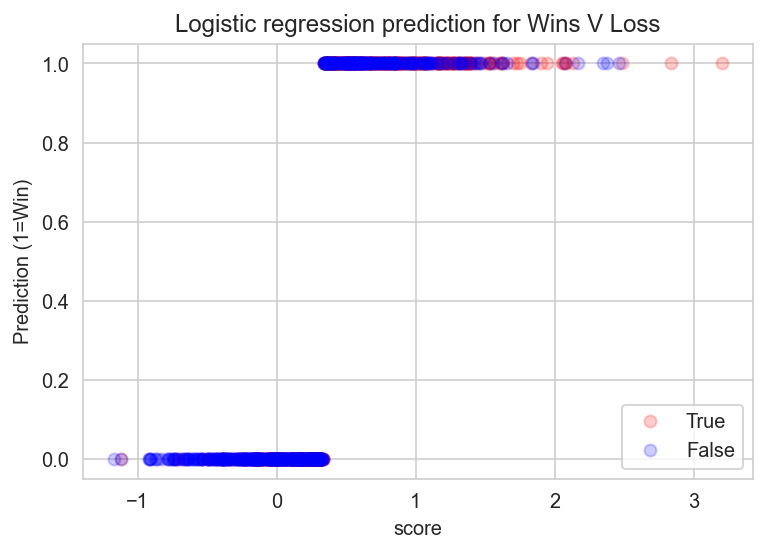

In [127]:
# Let's look at what lm1 did
import matplotlib.pyplot as plt

feature = X_test.reshape(-1,1)
prediction_hard = lr.predict(feature)

sf_mask = (y_test == 1).values

plt.plot(feature[sf_mask], prediction_hard[sf_mask], 'ro', label='True', alpha=0.2)
plt.plot(feature[~sf_mask], prediction_hard[~sf_mask], 'bo', label='False', alpha=0.2)
plt.ylim(-0.05, 1.05)
plt.xlabel('score')
plt.ylabel('Prediction (1=Win)')
plt.title('Logistic regression prediction for Wins V Loss')
plt.legend(loc='lower right');

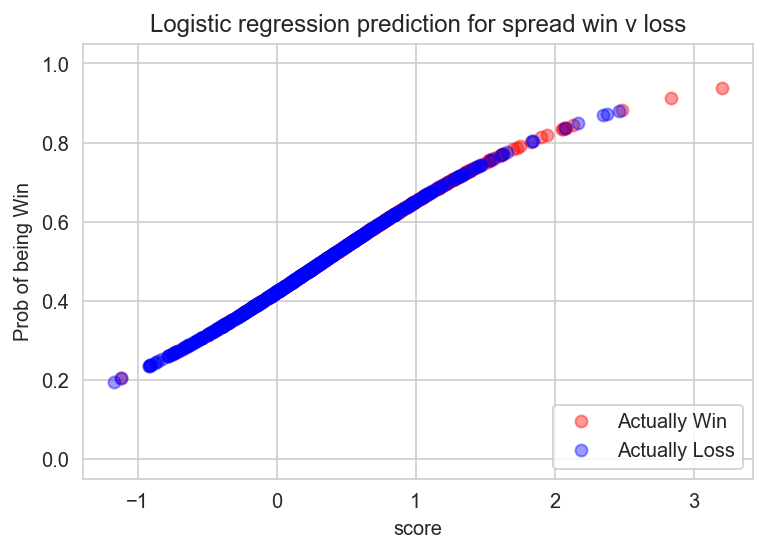

In [126]:
# This is the same model but with proba (returns probabilities instead of class)
prediction_soft = lr.predict_proba(feature)[:, 1]

plt.plot(feature[sf_mask], prediction_soft[sf_mask], 'ro', label='Actually Win',alpha=0.4)
plt.plot(feature[~sf_mask], prediction_soft[~sf_mask], 'bo', label='Actually Loss',alpha=0.4)
plt.ylim(-0.05, 1.05)
plt.xlabel('score')
plt.ylabel('Prob of being Win')
plt.title('Logistic regression prediction for spread win v loss')
plt.legend(loc='lower right');

In [155]:
lr.predict_proba([[0.7],[1]])[:,1]

array([0.58535994, 0.65178004])

In [117]:
lr.coef_

array([[0.94018887]])

In [118]:
lr.intercept_

array([-0.31331607])

In [119]:
lr.predict_proba([[],[23],[25]])[:,1]

ValueError: Expected 2D array, got 1D array instead:
array=[list([]) list([23]) list([25])].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [120]:
randomforest = RandomForestClassifier(min_samples_leaf =10, min_samples_split =5, max_depth =3)
randomforest.fit(X_train, y_train)
print('test:', randomforest.score(X_test, y_test))
print('train:',randomforest.score(X_train, y_train))

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.2017945   0.07936031  0.8016381  ...  0.49440843  0.8626121
 -0.44084772].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [355]:
#Split data into 3: 60% train, 20% validation, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2)

In [356]:
gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

eval_set=[(X_train,y_train),(X_val,y_val)]
fit_model = gbm.fit( 
                    X_train, y_train, 
                    eval_set=eval_set,
                    eval_metric='auc', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=True
                   )

accuracy_score(y_test, gbm.predict(X_test, ntree_limit=gbm.best_ntree_limit)) 

[0]	validation_0-auc:0.66037	validation_1-auc:0.64221
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 50 rounds.
[1]	validation_0-auc:0.67380	validation_1-auc:0.64492
[2]	validation_0-auc:0.69013	validation_1-auc:0.64155
[3]	validation_0-auc:0.69614	validation_1-auc:0.63794
[4]	validation_0-auc:0.69682	validation_1-auc:0.64010
[5]	validation_0-auc:0.70997	validation_1-auc:0.63140
[6]	validation_0-auc:0.71298	validation_1-auc:0.63375
[7]	validation_0-auc:0.71303	validation_1-auc:0.63724
[8]	validation_0-auc:0.71313	validation_1-auc:0.63739
[9]	validation_0-auc:0.71207	validation_1-auc:0.64192
[10]	validation_0-auc:0.71585	validation_1-auc:0.64547
[11]	validation_0-auc:0.71598	validation_1-auc:0.64714
[12]	validation_0-auc:0.72017	validation_1-auc:0.64706
[13]	validation_0-auc:0.72130	validation_1-auc:0.65125
[14]	validation_0-auc:0.72160	validation_1-auc:0.65080
[15]	validation_0-auc:0.7234

0.5898876404494382

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)

In [358]:
ss=StandardScaler()
xscale=ss.fit_transform(X_train)
x_test_scale = ss.fit_transform(X_test)

In [359]:
ss=StandardScaler()
xscale=ss.fit_transform(X_train)
x_test_scale = ss.fit_transform(X_test)

knn = KNeighborsClassifier(n_neighbors=9)
nearest = knn.fit(X_train, y_train)
print(nearest.score(xscale, y_train))
print(nearest.score(x_test_scale, y_test))

0.5302013422818792
0.5090702947845805


In [187]:
df.head(40)

,target,opposition,schedule_season,target_spread,beat_spread,target_home,target_adj_for_timezone_EtoW,target_adj_for_timezone_WtoE,off_target_PPG,off_opp_PPG,...,opp_def_yards_game,def_points_spread_impactor,off_yards_spread_impactor,def_yards_spread_impactor,off_yards_SI,def_yards_SI,off_comp_SI,def_comp_SI,newX,newX_above_1
0,New England Patriots,Pittsburgh Steelers,2015,-7.0,0,1,0.0,0.0,29.0625,26.4375,...,363.0625,107.0,82.0,68.0,1.154749,1.374642,1.027375,0.922861,0.188673,0
1,Arizona Cardinals,Pittsburgh Steelers,2015,-5.5,0,0,-2.0,0.0,30.5625,26.4375,...,363.0625,105.5,80.5,69.5,1.282682,1.274876,1.095761,0.930039,0.397772,0
2,Denver Broncos,Pittsburgh Steelers,2015,-7.5,0,1,0.0,2.0,22.1875,26.4375,...,363.0625,107.5,82.5,67.5,1.089702,1.155295,0.780692,0.863162,-0.336390,0
3,Denver Broncos,Pittsburgh Steelers,2015,7.5,1,0,-2.0,0.0,22.1875,26.4375,...,363.0625,92.5,67.5,82.5,1.331858,0.945242,0.907290,1.003135,0.330000,1
4,Oakland Raiders,Pittsburgh Steelers,2015,6.0,1,0,-3.0,0.0,22.4375,26.4375,...,363.0625,94.0,69.0,81.0,1.222275,1.236481,0.902872,1.330621,-0.020541,0
5,San Diego Chargers,Pittsburgh Steelers,2015,4.0,0,1,0.0,0.0,20.0000,26.4375,...,363.0625,96.0,71.0,79.0,1.324304,1.261900,0.788022,1.299634,-0.360593,0
6,St. Louis Rams,Pittsburgh Steelers,2015,1.0,0,1,0.0,0.0,17.5000,26.4375,...,363.0625,99.0,74.0,76.0,1.016877,1.333004,0.668625,1.044932,-0.521088,0
7,San Francisco 49ers,Pittsburgh Steelers,2015,6.0,0,0,-3.0,0.0,14.8750,26.4375,...,363.0625,94.0,69.0,81.0,1.113241,1.317453,0.598561,1.290602,-0.751849,0
8,Kansas City Chiefs,Pittsburgh Steelers,2015,-3.5,1,1,0.0,1.0,25.3125,26.4375,...,363.0625,103.5,78.5,71.5,1.066907,1.268589,0.925069,0.869262,0.131253,1
9,Cincinnati Bengals,Pittsburgh Steelers,2015,-1.0,0,1,0.0,0.0,26.1875,26.4375,...,363.0625,101.0,76.0,74.0,1.191219,1.268535,0.980736,0.865949,0.352000,0


In [268]:
df['newX_above_1']=0
df.loc[(df['newX']>=.7), 'newX_above_1']=1

In [269]:
df.newX_above_1.sum()

579

In [270]:
X=df['newX_above_1'].values
y = df['beat_spread']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=11)
xscale = X_train
lr = LogisticRegression()
lr.fit(xscale.reshape(-1,1), y_train)
xscale_test = ss.fit_transform(X_test.reshape(-1,1))
score = lr.score(xscale_test, y_test)
score

0.597752808988764

In [271]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none')

lr.fit(xscale.reshape(-1,1), y_train)

y_preds = lr.predict(xscale_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.58      0.85      0.69       703
           1       0.66      0.31      0.42       632

    accuracy                           0.60      1335
   macro avg       0.62      0.58      0.56      1335
weighted avg       0.62      0.60      0.56      1335



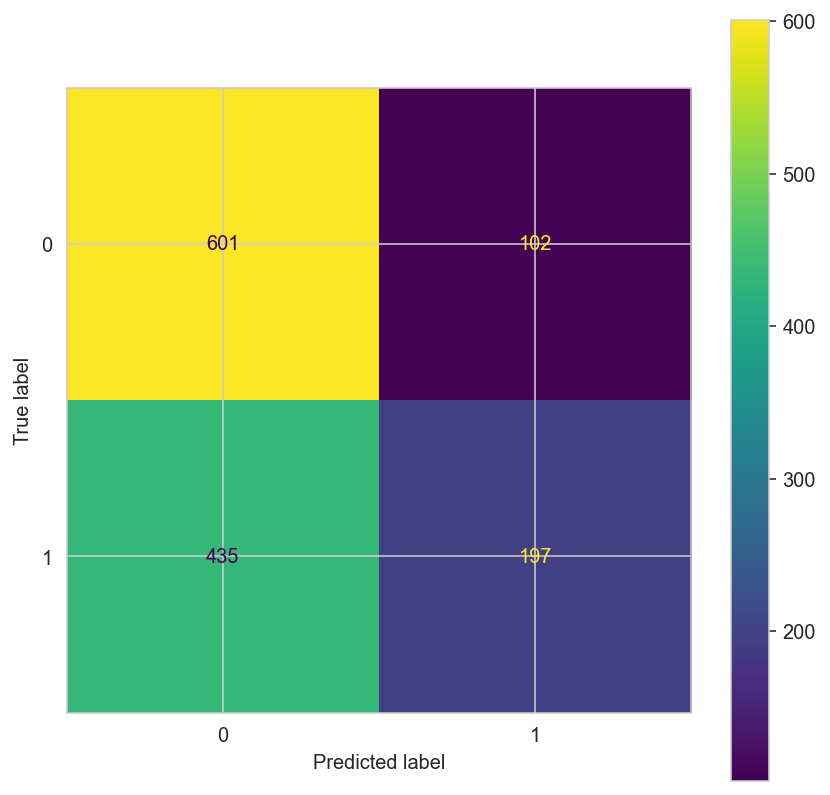

In [272]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(lr, X_test.reshape(-1,1), y_test, ax=ax);

In [273]:
df.shape

(2670, 30)

In [ ]:
df_week_7 = df[]